In [24]:
!curl -L -o ./dataset/adult-income-dataset.zip https://www.kaggle.com/api/v1/datasets/download/wenruliu/adult-income-dataset
!curl -L -o ./dataset/titanic-dataset.zip https://www.kaggle.com/api/v1/datasets/download/yasserh/titanic-dataset

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

 12  652k   12 81668    0     0  72138      0  0:00:09  0:00:01  0:00:08 72138
100  652k  100  652k    0     0   430k      0  0:00:01  0:00:01 --:--:-- 1502k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 22564  100 22564    0     0  26640      0 --

## Import Bibliotecas

In [25]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


## Descompactar os datasets

In [26]:
with zipfile.ZipFile('./dataset/adult-income-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('./dataset/')

## Manipulação de dados

In [27]:
path_dataset = './dataset/adult.csv'

In [28]:
dataframe = pd.read_csv(path_dataset)
dataframe

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [29]:
# Marque todas as linhas que estao com dados faltantes salva em um dataframe
def verificar_dados_faltantes(df):
    missing_data = df.isin(['?'])
    missing_rows = df[missing_data.any(axis=1)]
    return missing_rows, missing_data

In [30]:
missing_data = verificar_dados_faltantes(dataframe)[1]

In [31]:
(verificar_dados_faltantes(dataframe)[1]).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [32]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [33]:
dataframe.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [34]:
## Tratamento de dados faltantes
for column in dataframe.columns:
    if missing_data[column].any():
        mode = dataframe[column].mode()[0]
        dataframe.loc[missing_data[column], column] = mode
dataframe

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [35]:
verificar_dados_faltantes(dataframe)[0]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income


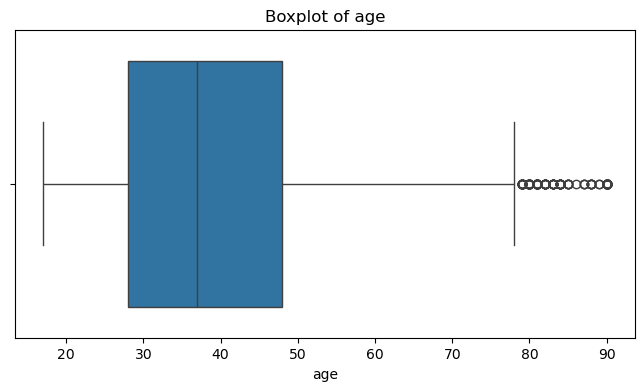

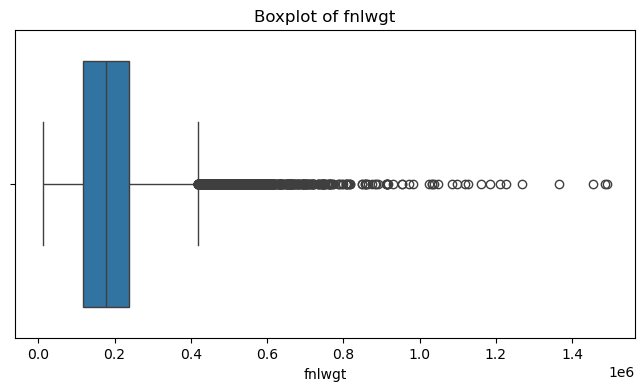

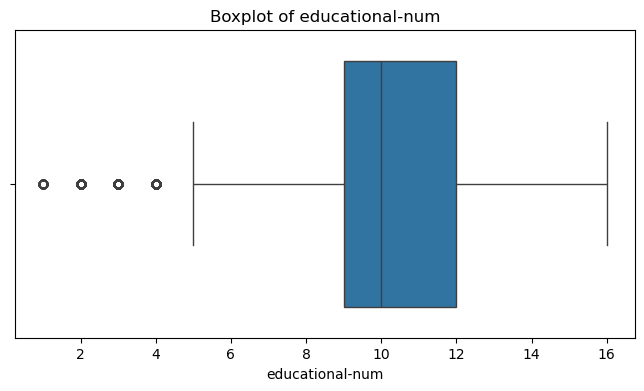

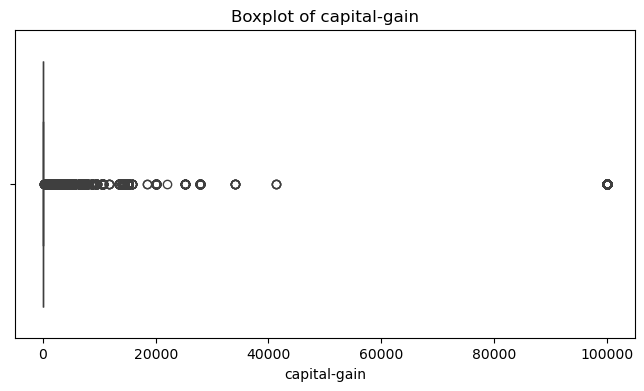

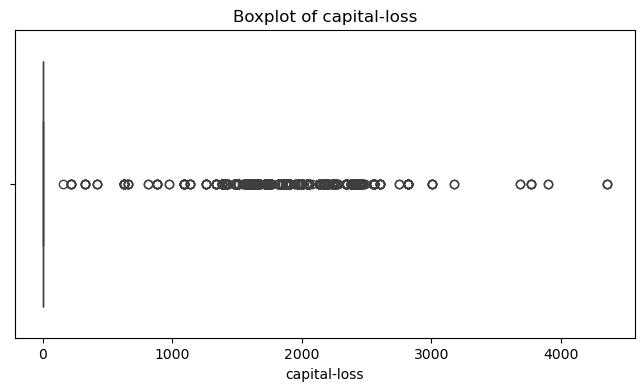

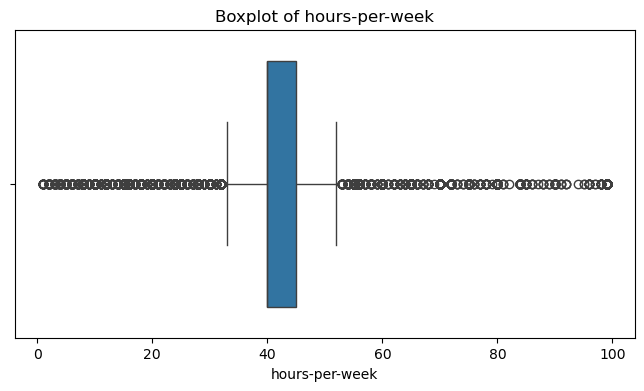

In [36]:
# Detecte e trate possíveis outliers.
for column in dataframe.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=dataframe[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [45]:
# Agrupar valores Income
dataframe['income'].value_counts()

income
0    37155
1    11687
Name: count, dtype: int64

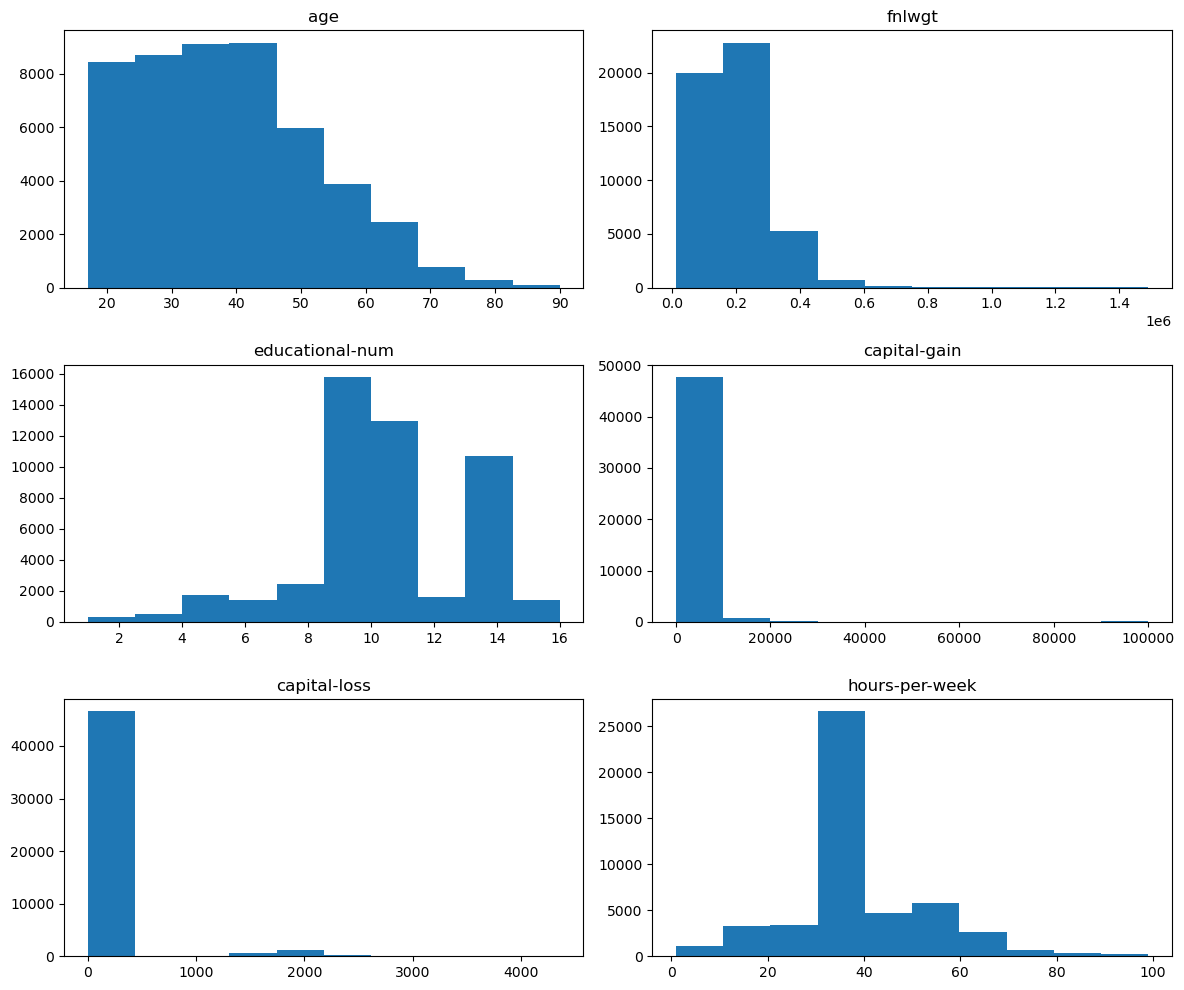

In [38]:
# Exibe o histograma de cada coluna
axarr = dataframe.hist(figsize=(12, 10))
plt.tight_layout()
for ax in axarr.flatten():
    ax.grid(False)

In [ ]:
# COnverte colunas categoricas em numericas
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in dataframe.columns:  # ignora a última coluna
    if dataframe[column].dtype == 'object':
        le = LabelEncoder()
        dataframe[column] = le.fit_transform(dataframe[column])
        label_encoders[column] = le
dataframe

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,3,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,3,160323,15,10,2,6,0,2,1,7688,0,40,38,1
4,18,3,103497,15,10,4,9,3,4,0,0,0,30,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
48838,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
48839,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
48840,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [40]:
dataframe.describe()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,3.099668,1.896641e+05,10.288420,10.078089,2.618750,6.152819,1.443287,3.668052,0.668482,1079.067626,87.502314,40.422382,36.433664,0.239282
std,13.710510,1.110810,1.056040e+05,3.874492,2.570973,1.507703,3.968837,1.602151,0.845986,0.470764,7452.019058,403.004552,12.391444,6.031536,0.426649
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,1.175505e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,1.781445e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,48.000000,3.000000,2.376420e+05,12.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,7.000000,1.490400e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


In [41]:
# # Normalize os dados para adequar à escala das variáveis
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# dataframe.iloc[:, :-1] = scaler.fit_transform(dataframe.iloc[:, :-1])
# dataframe

In [42]:
# verifique como variáveis como idade, escolaridade,
# horas de trabalho e ocupação influenciam na renda.
X = dataframe[['age', 'educational-num', 'hours-per-week', 'occupation']]
y = dataframe['income']
X = sm.add_constant(X)
model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.445054
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 income   No. Observations:                48842
Model:                          Logit   Df Residuals:                    48837
Method:                           MLE   Df Model:                            4
Date:                Thu, 28 Aug 2025   Pseudo R-squ.:                  0.1912
Time:                        21:21:22   Log-Likelihood:                -21737.
converged:                       True   LL-Null:                       -26875.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.4730      0.090    -93.746      0.000      -8.650      -8.296
age           

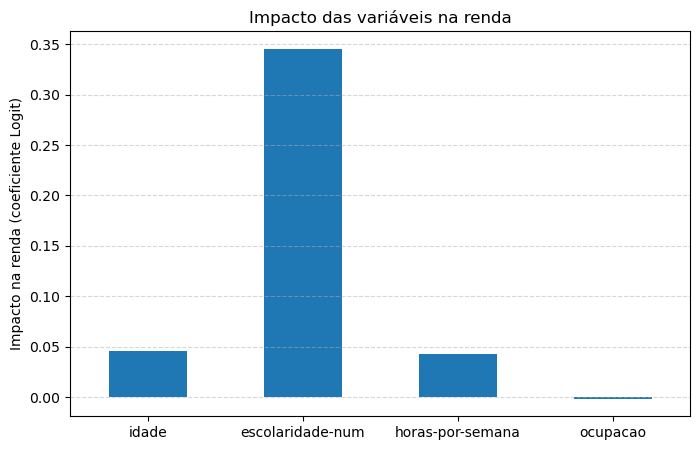

In [43]:
# Gráfico de barras dos coeficientes do modelo
nomes_coeficientes = ['idade', 'escolaridade-num', 'horas-por-semana', 'ocupacao']
coeficientes = model.params[1:]  # Ignora o intercepto

coeficientes.plot.bar(figsize=(8, 5))
plt.ylabel('Impacto na renda (coeficiente Logit)')
plt.title('Impacto das variáveis na renda')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(ticks=range(len(nomes_coeficientes)), labels=nomes_coeficientes, rotation=0)
plt.show()



In [46]:
# Produza visualizações em 2D, utilizando gráficos de dispersão, histogramas,
# boxplots e gráficos de barras agrupadas, de forma a destacar relações entre
# variáveis correlacionadas.